In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import numpy as np
import plotly.express as px
import datetime
import statsmodels.stats.api as sms

In [2]:
data1 = pd.read_csv('Monthly_PerformanceF112Q22008.csv')
data2 = pd.read_csv('Orginanation_MortgageF112Q22008.csv')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (7,23) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
data1['mth_reprt_prd'] =pd.to_datetime(data1['mth_reprt_prd'])

In [4]:
data2['first_payment_date'] =pd.to_datetime(data2['first_payment_date'])

In [5]:
data1.describe(include ='all')

,ln_seq_number,mth_reprt_prd,curr_actl_upb,curr_ln_delq_stas,ln_age,remng_mth,rep_flag,mod_flag,zero_bal_cd,zero_bal_eff_dt,...,exp_amt,lgl_cst,other_cst,ti_ins_cst,misc_exp,loss_cal,mod_cst,step_mod_flag,dfrd_pmt_mod,eltv
count,285506,285506,285506.000000,285490.000000,285506.000000,285506.000000,2416,9,2416.000000,2416.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5099.000000,9,285506,39138.000000
unique,4999,74,NaN,NaN,NaN,NaN,2,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,NaN
top,F112Q2008401,2012-07-01 00:00:00,NaN,NaN,NaN,NaN,N,Y,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,,NaN
freq,148,5083,NaN,NaN,NaN,NaN,2408,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,285497,NaN
first,NaN,2012-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,200762.896717,0.009895,32.563554,327.356931,NaN,NaN,1.043874,201486.992964,...,-18077.444444,-2388.777778,-10608.777778,-3783.000000,-1297.111111,-30068.555556,1.170818,NaN,NaN,50.366447
std,NaN,NaN,111137.760940,0.255035,20.944889,21.509610,NaN,NaN,0.541965,179.368800,...,21963.127129,2196.579430,10214.750006,14112.254329,377.745763,19699.603924,67.036121,NaN,NaN,15.107587
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,201205.000000,...,-67122.000000,-5460.000000,-26953.000000,-38926.000000,-2273.000000,-52074.000000,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,115624.000000,0.000000,14.000000,310.000000,NaN,NaN,1.000000,201306.000000,...,-30918.000000,-4826.000000,-21309.000000,-4735.000000,-1227.000000,-46370.000000,0.000000,NaN,NaN,40.000000


In [6]:
data2.describe(include = 'all')

,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,msa_code,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,...,property_st,property_type,postal_code,ln_seq_number,ln_purpose,orig_ln_term,borrower_cnt,seller_name,servicer_name,super_confirm_flag
count,4999.000000,4999,4999,4999.000000,4161.000000,4999.000000,4999.000000,4999,4999.000000,4999.000000,...,4999,4999,4999.000000,4999,4999,4999.000000,4999.000000,4999,4999,209
unique,NaN,6,3,NaN,NaN,NaN,NaN,3,NaN,NaN,...,52,4,NaN,4999,3,NaN,NaN,8,9,1
top,NaN,2012-06-01 00:00:00,9,NaN,NaN,NaN,NaN,P,NaN,NaN,...,CA,SF,NaN,F112Q2009711,N,NaN,NaN,Other sellers,Other servicers,Y
freq,NaN,4281,3273,NaN,NaN,NaN,NaN,4539,NaN,NaN,...,564,3706,NaN,1,2039,NaN,NaN,2403,2030,209
first,NaN,2012-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,763.511702,NaN,NaN,204203.673735,29666.031242,4.424885,1.018404,NaN,73.072615,32.956991,...,NaN,NaN,49035.007001,NaN,NaN,359.825365,1.597520,NaN,NaN,NaN
std,38.993282,NaN,NaN,20.607835,11343.144927,10.051285,0.171094,NaN,15.438921,32.166483,...,NaN,NaN,30218.860776,NaN,NaN,2.477693,0.490447,NaN,NaN,NaN
min,605.000000,NaN,NaN,203801.000000,10180.000000,0.000000,1.000000,NaN,12.000000,3.000000,...,NaN,NaN,1000.000000,NaN,NaN,308.000000,1.000000,NaN,NaN,NaN
25%,739.000000,NaN,NaN,204205.000000,17300.000000,0.000000,1.000000,NaN,66.000000,24.000000,...,NaN,NaN,22000.000000,NaN,NaN,360.000000,1.000000,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE64E16548>,
      dtype=object)

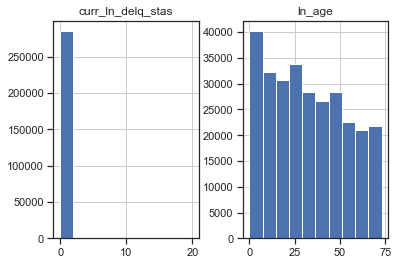

In [7]:
data1.hist(column =["ln_age","curr_ln_delq_stas",])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



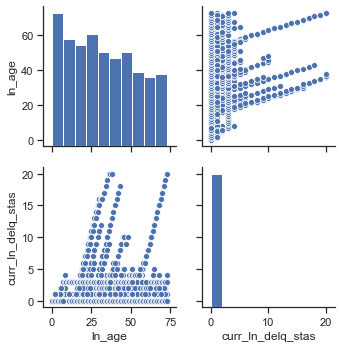

In [8]:
sns.pairplot(data1, vars = ["ln_age", "curr_ln_delq_stas"])
plt.show()

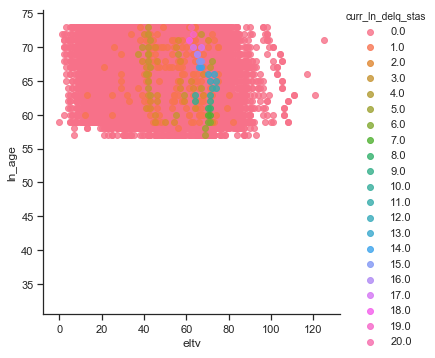

In [9]:
sns.lmplot(x ="eltv", y= "ln_age", data =data1, fit_reg=False, hue ="curr_ln_delq_stas")

In [10]:
data1.corr()

,curr_actl_upb,curr_ln_delq_stas,ln_age,remng_mth,zero_bal_cd,zero_bal_eff_dt,curr_int_rt,curr_defrd_upb,ddlpi,mi_upb,net_sls_amt,non_mi_amt,exp_amt,lgl_cst,other_cst,ti_ins_cst,misc_exp,loss_cal,mod_cst,eltv
curr_actl_upb,1.000000,-0.005354,-0.112715,0.114835,NaN,NaN,-0.100314,-0.002402,0.655308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035036,0.069399
curr_ln_delq_stas,-0.005354,1.000000,0.015304,0.003282,0.077037,0.046973,0.037927,-0.000103,-0.093729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000736,0.029924
ln_age,-0.112715,0.015304,1.000000,-0.965814,-0.120003,0.984387,-0.033133,0.004920,0.935737,-0.069124,-0.254492,0.409744,0.075065,-0.416083,0.321622,-0.025297,-0.968795,0.137069,0.013207,-0.067515
remng_mth,0.114835,0.003282,-0.965814,1.000000,-0.526630,-0.743605,0.042125,-0.004781,0.546933,-0.069124,-0.254492,0.409744,0.075065,-0.416083,0.321622,-0.025297,-0.968795,0.137069,0.091790,0.025520
zero_bal_cd,NaN,0.077037,-0.120003,-0.526630,1.000000,-0.034559,-0.568096,NaN,-0.574337,0.069124,0.254492,-0.409744,-0.075065,0.416083,-0.321622,0.025297,0.968795,-0.137069,NaN,NaN
zero_bal_eff_dt,NaN,0.046973,0.984387,-0.743605,-0.034559,1.000000,-0.040595,NaN,0.843795,0.292357,0.516488,0.160199,-0.556075,-0.272574,-0.562223,-0.411360,-0.174568,0.246632,NaN,NaN
curr_int_rt,-0.100314,0.037927,-0.033133,0.042125,-0.568096,-0.040595,1.000000,0.001267,0.621737,-0.069124,-0.254492,0.409744,0.075065,-0.416083,0.321622,-0.025297,-0.968795,0.137069,-0.005086,0.074732
curr_defrd_upb,-0.002402,-0.000103,0.004920,-0.004781,NaN,NaN,0.001267,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000591,0.007634
ddlpi,0.655308,-0.093729,0.935737,0.546933,-0.574337,0.843795,0.621737,NaN,1.000000,0.245274,0.247723,0.302921,-0.643240,-0.596547,-0.586756,-0.471302,-0.456341,0.275854,NaN,-0.305255
mi_upb,NaN,NaN,-0.069124,-0.069124,0.069124,0.292357,-0.069124,NaN,0.245274,1.000000,0.890932,0.763151,-0.812446,-0.530172,-0.335939,-0.936877,-0.069663,0.844944,NaN,NaN


In [11]:
data2.corr()

,credit_score,maturity_date,msa_code,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,postal_code,orig_ln_term,borrower_cnt
credit_score,1.000000,-0.023138,0.021444,-0.058225,-0.008040,-0.099115,-0.030449,0.064874,-0.096372,-0.198453,0.034863,-0.020107,-0.025595
maturity_date,-0.023138,1.000000,0.048814,0.007680,-0.015661,0.016137,0.008725,0.016510,0.010873,0.009301,0.025036,0.997315,-0.000365
msa_code,0.021444,0.048814,1.000000,-0.049781,-0.023020,-0.050886,0.010201,0.098509,-0.044267,0.035404,0.194397,0.047584,0.016192
mi_percent,-0.058225,0.007680,-0.049781,1.000000,-0.047363,0.546351,0.000588,-0.033740,0.570468,0.041828,-0.016435,0.006531,-0.034626
unit_cnt,-0.008040,-0.015661,-0.023020,-0.047363,1.000000,-0.067540,0.007015,0.045372,-0.059865,0.168831,-0.021060,-0.016488,-0.007086
orig_cltv,-0.099115,0.016137,-0.050886,0.546351,-0.067540,1.000000,0.015435,0.029483,0.955526,0.072210,-0.029400,0.014632,-0.036277
orig_debt_to_inc,-0.030449,0.008725,0.010201,0.000588,0.007015,0.015435,1.000000,0.041340,0.014937,0.052050,0.016096,0.008298,-0.006741
orig_upb,0.064874,0.016510,0.098509,-0.033740,0.045372,0.029483,0.041340,1.000000,-0.027422,-0.056256,0.037330,0.020673,0.171317
orig_ltv,-0.096372,0.010873,-0.044267,0.570468,-0.059865,0.955526,0.014937,-0.027422,1.000000,0.087352,-0.032237,0.009163,-0.052789
orig_int_rate,-0.198453,0.009301,0.035404,0.041828,0.168831,0.072210,0.052050,-0.056256,0.087352,1.000000,0.028178,0.009081,-0.016499


In [12]:
pg.corr(x=data1['curr_ln_delq_stas'], y=data1['ln_age'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,285490,0.015,"[0.01, 0.02]",0.0,0.0,2.897784e-16,7.783e+11,1.0


Text(0.5, 1, 'Correlation matrix')

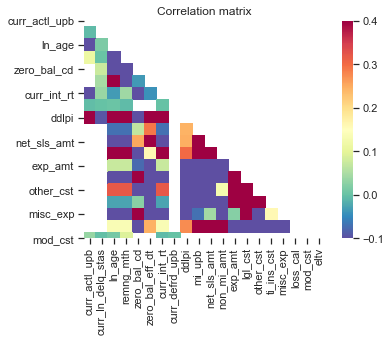

In [13]:
corrs = data1.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.1, vmax=.4)
plt.title('Correlation matrix')

Text(0.5, 1, 'Correlation matrix')

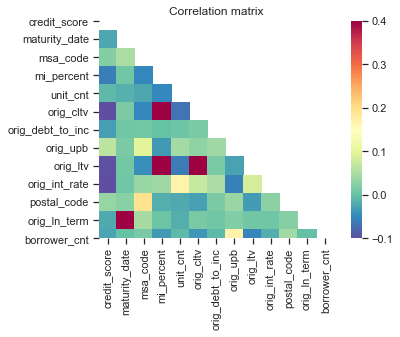

In [14]:
corrs = data2.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.1, vmax=.4)
plt.title('Correlation matrix')

In [16]:
data1.dtypes

ln_seq_number                object
mth_reprt_prd        datetime64[ns]
curr_actl_upb                 int64
curr_ln_delq_stas           float64
ln_age                        int64
remng_mth                     int64
rep_flag                     object
mod_flag                     object
zero_bal_cd                 float64
zero_bal_eff_dt             float64
curr_int_rt                 float64
curr_defrd_upb                int64
ddlpi                       float64
mi_upb                      float64
net_sls_amt                 float64
non_mi_amt                  float64
exp_amt                     float64
lgl_cst                     float64
other_cst                   float64
ti_ins_cst                  float64
misc_exp                    float64
loss_cal                    float64
mod_cst                     float64
step_mod_flag                object
dfrd_pmt_mod                 object
eltv                        float64
dtype: object

In [17]:
data2.dtypes

credit_score                          int64
first_payment_date           datetime64[ns]
first_time_homebuyer_flag            object
maturity_date                         int64
msa_code                            float64
mi_percent                            int64
unit_cnt                              int64
occupancy_status                     object
orig_cltv                             int64
orig_debt_to_inc                      int64
orig_upb                              int64
orig_ltv                              int64
orig_int_rate                         int64
channel                              object
ppm_flag                             object
product_type                         object
property_st                          object
property_type                        object
postal_code                           int64
ln_seq_number                        object
ln_purpose                           object
orig_ln_term                          int64
borrower_cnt                    

In [15]:
delqncy = data1['curr_ln_delq_stas']
results =sms.DescrStatsW(delqncy)
print(results.tconfint_mean())

(nan, nan)
